In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv("../titanic.csv")

In [6]:
df.head()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  714 non-null    int64  
 1   pclass    714 non-null    int64  
 2   name      714 non-null    object 
 3   sex       714 non-null    object 
 4   age       714 non-null    float64
 5   fare      714 non-null    float64
 6   sibsp     714 non-null    int64  
 7   parch     714 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 44.8+ KB


In [8]:
df.describe()


,survived,pclass,age,fare,sibsp,parch
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,34.694514,0.512605,0.431373
std,0.491460,0.838250,14.526497,52.918930,0.929783,0.853289
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,8.050000,0.000000,0.000000
50%,0.000000,2.000000,28.000000,15.741700,0.000000,0.000000
75%,1.000000,3.000000,38.000000,33.375000,1.000000,1.000000
max,1.000000,3.000000,80.000000,512.329200,5.000000,6.000000


In [9]:
df.isnull().sum()

survived    0
pclass      0
name        0
sex         0
age         0
fare        0
sibsp       0
parch       0
dtype: int64

In [10]:
df.dropna()

,survived,pclass,name,sex,age,fare,sibsp,parch
0,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,0,0
...,...,...,...,...,...,...,...,...
709,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,29.1250,0,5
710,0,2,"Montvila, Rev. Juozas",male,27.0,13.0000,0,0
711,1,1,"Graham, Miss. Margaret Edith",female,19.0,30.0000,0,0
712,1,1,"Behr, Mr. Karl Howell",male,26.0,30.0000,0,0


In [13]:
df["AgeGroup"]=pd.cut(df["age"],bins=[0,12,18,60,100],labels=["Child","Teen","Adult","Senior"])

In [14]:
print(df["AgeGroup"])

0      Adult
1      Adult
2      Adult
3      Adult
4      Adult
       ...  
709    Adult
710    Adult
711    Adult
712    Adult
713    Adult
Name: AgeGroup, Length: 714, dtype: category
Categories (4, object): ['Child' < 'Teen' < 'Adult' < 'Senior']


In [29]:
survival_by_gender=df.groupby("sex")["survived"].mean()
print(survival_by_gender)

sex
female    0.754789
male      0.205298
Name: survived, dtype: float64


In [30]:
df.groupby("pclass")["survived"].mean()

pclass
1    0.655914
2    0.479769
3    0.239437
Name: survived, dtype: float64

In [31]:
df.groupby("AgeGroup")["survived"].mean()


/var/folders/vp/xzl4_ng54mq8b56ssxrmkyjr0000gn/T/ipykernel_9466/3854376447.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["survived"].mean()


AgeGroup
Child     0.579710
Teen      0.428571
Adult     0.388788
Senior    0.227273
Name: survived, dtype: float64

In [32]:
df.groupby(["sex","pclass","AgeGroup"])["survived"].mean()

/var/folders/vp/xzl4_ng54mq8b56ssxrmkyjr0000gn/T/ipykernel_9466/2869849425.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["sex","pclass","AgeGroup"])["survived"].mean()


sex     pclass  AgeGroup
female  1       Child       0.000000
                Teen        1.000000
                Adult       0.972222
                Senior      1.000000
        2       Child       1.000000
                Teen        1.000000
                Adult       0.900000
                Senior           NaN
        3       Child       0.478261
                Teen        0.550000
                Adult       0.413793
                Senior      1.000000
male    1       Child       1.000000
                Teen        0.500000
                Adult       0.416667
                Senior      0.083333
        2       Child       1.000000
                Teen        0.000000
                Adult       0.061728
                Senior      0.333333
        3       Child       0.360000
                Teen        0.076923
                Adult       0.136364
                Senior      0.000000
Name: survived, dtype: float64

Text(0, 0.5, 'Survival rate')

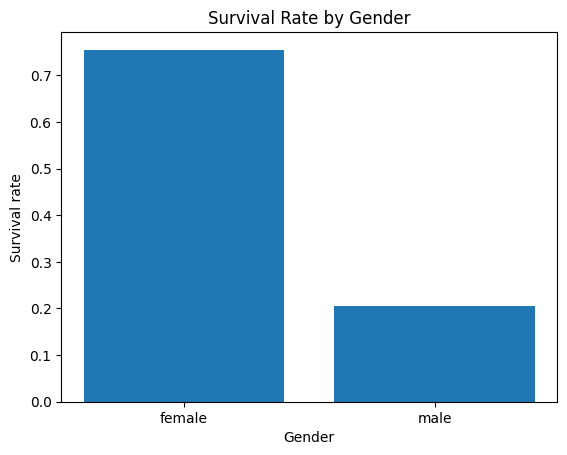

In [34]:
plt.bar(survival_by_gender.index,survival_by_gender.values,)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Survival rate")

(array([186.,   0.,   0.,   0.,   0., 173.,   0.,   0.,   0., 355.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

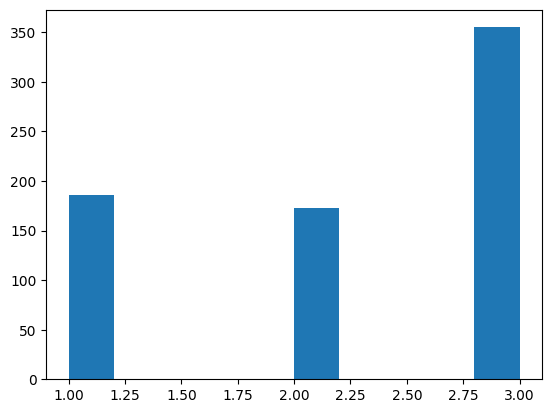

In [42]:
plt.hist(df["pclass"])

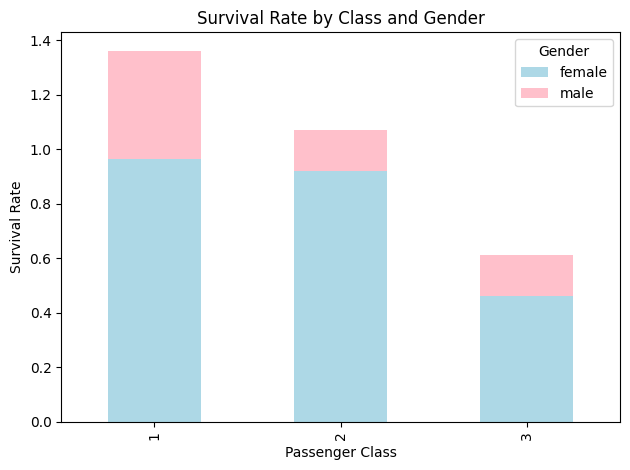

In [44]:
grouped = df.groupby(['pclass', 'sex'])['survived'].mean().unstack()
##unstack() reshapes the data so the gender categories appear side by side

grouped.plot(kind='bar', stacked=True, color=['lightblue', 'pink'])
##stacked= true will stack the bars 

plt.title("Survival Rate by Class and Gender")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

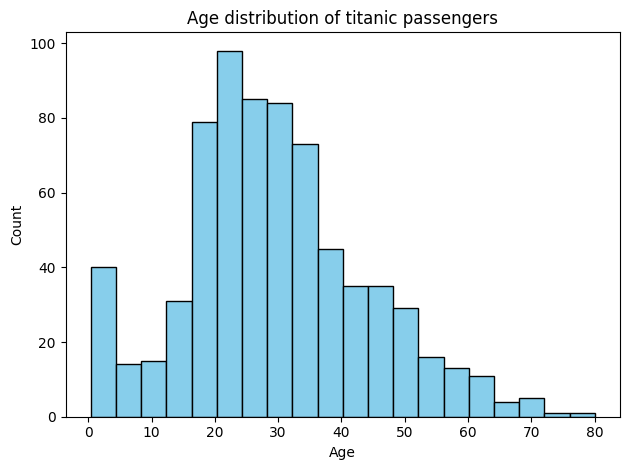

In [45]:
plt.hist(df["age"],bins=20,color="skyblue",edgecolor="black")
plt.title("Age distribution of titanic passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.tight_layout()
plt.show()